# 붓꽃 데이터 군집화

## k-means 클러스터링

### 데이터 셋(Dataset) 및 전처리

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터셋 준비
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris.target # 0: 세투사 1: 버지니카 2: 버시칼라

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris_df['target']=iris.target
iris_df['target_names']=iris_df['target'].apply(lambda x: 'setosa' if x==0 else('versicolor' if x == 1 else 'virginica')) # 람다 한 번에 적용 if문여러개
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


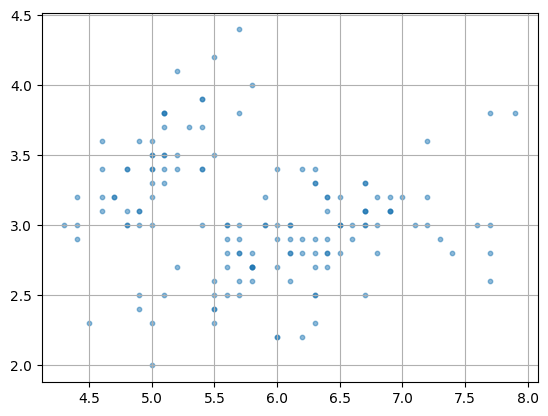

In [13]:
plt.scatter(x=iris_df['sepal length (cm)'].values, y=iris_df['sepal width (cm)'].values, alpha=0.5, s=10)
plt.grid()
plt.show()

## 최적의 K 찾기: 엘보우 방식


### k가 2인 경우

In [31]:
from sklearn.cluster import KMeans
x = iris_df[['sepal length (cm)','sepal width (cm)']]
model2 = KMeans(n_clusters = 2, random_state = 111)
model2.fit(x)

KMeans(n_clusters=2, random_state=111)

In [32]:
model2.cluster_centers_

array([[5.22409639, 3.1313253 ],
       [6.61044776, 2.96567164]])

In [35]:
model2.inertia_

58.20409278906673

In [34]:
pred2 = model2.predict(x)
iris_df['k=2'] = pred2

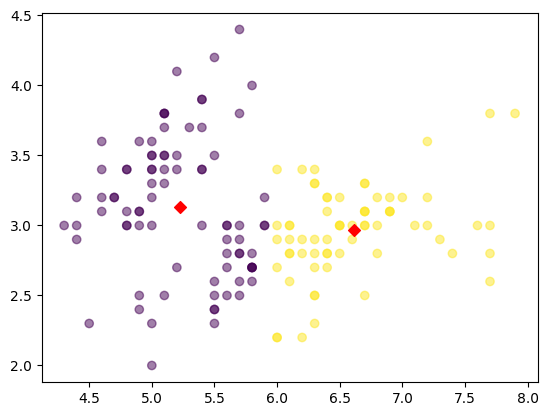

In [48]:
# 모델 2 시각화
model2_df = pd.DataFrame(x, columns=iris.feature_names[:2])
model2_df['cluster2']=iris_df['k=2'].values
plt.scatter(model2_df.iloc[:,0],model2_df.iloc[:,1],c=model2_df.cluster2, alpha=0.5) # 색깔을 모델2의 군집별로 설정!
plt.scatter(model2.cluster_centers_[:,0],model2.cluster_centers_[:,1], c='r', marker='D') # 군집의 중심을 찍어줌
plt.show()

### k를 3으로 군집 개수 지정

In [49]:
model3 = KMeans(n_clusters=3, random_state=111)
model3.fit(x)

pred3 = model3.predict(x)
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [51]:
model3_df = pd.DataFrame(x, columns=iris.feature_names[:2])
model3_df['cluster3']=pred3
model3_df

,sepal length (cm),sepal width (cm),cluster3
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


In [56]:
model3.inertia_

37.05070212765958

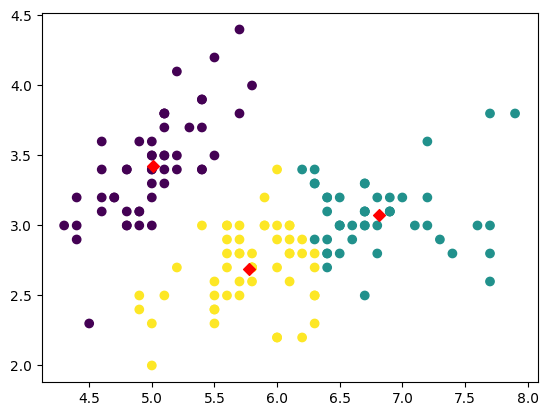

In [55]:
# model3 시각화
plt.scatter(model3_df.iloc[:,0],model3_df.iloc[:,1], c=model3_df.cluster3)
plt.scatter(model3.cluster_centers_[:,0],model3.cluster_centers_[:,1],c='r',marker='D')
plt.show()

### k=5 로 군집 수행

In [58]:
model5 = KMeans(n_clusters=5, random_state=111)
model5.fit(x)
pred5 = model5.predict(x)
pred5.shape

(150,)

In [62]:
model5_df = pd.DataFrame(x,columns=iris.feature_names[:2])
model5_df['cluster5']=pred5
model5_df

,sepal length (cm),sepal width (cm),cluster5
0,5.1,3.5,0
1,4.9,3.0,4
2,4.7,3.2,4
3,4.6,3.1,4
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,1
147,6.5,3.0,2
148,6.2,3.4,2


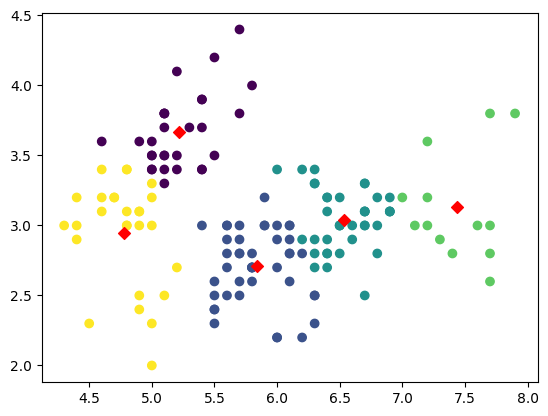

In [64]:
plt.scatter(model5_df.iloc[:,0],model5_df.iloc[:,1],c=model5_df.cluster5)
plt.scatter(model5.cluster_centers_[:,0],model5.cluster_centers_[:,1],c='r',marker='D')
plt.show()

### 최적의 K찾기: 엘보우 방식

In [70]:
k_list = range(2,11)
inertias = []
for k in k_list:
    modelk = KMeans(n_clusters=k, random_state=111)
    modelk.fit(x)
    predk = modelk.predict(x)
    inertias.append(modelk.inertia_)
print('min_inertia is',min(inertias),inertias.index(min(inertias)))

min_inertia is 9.594201984126984 8


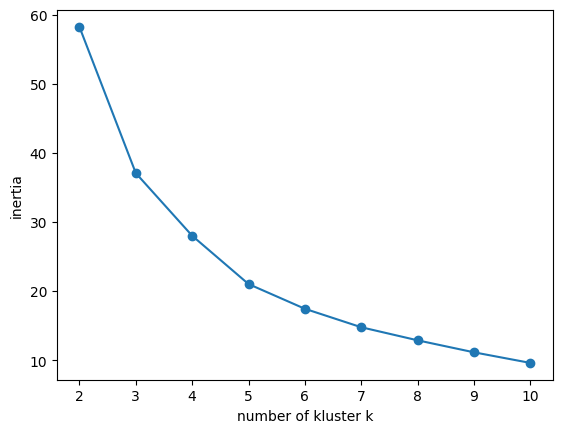

In [73]:
plt.plot(k_list, inertias, marker = 'o')
plt.xlabel('number of kluster k')
plt.ylabel('inertia')
plt.show()

# [실습] 다음의 데이터셋을 활용하여 KMeans 군집 모델을 구축하라

* 데이터셋 : clustering_dataset.csv

In [79]:
cluster=pd.read_csv('C:/Users/gihun/Python_Data/data/clustering_dataset.csv',index_col=0) # 혹은 usecols사용
cluster

,x1,x2
0,-5.673888,9.134580
1,7.783390,-7.145758
2,7.532874,-4.235851
3,-1.497504,9.437434
4,-2.912560,6.562741
...,...,...
195,-1.438523,9.690181
196,-0.252837,10.182634
197,7.415080,-4.526361
198,-1.795357,8.488310


In [83]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
dtypes: float64(2)
memory usage: 4.7 KB


In [81]:
x = cluster.values

In [84]:
k_list = range(2,11)
inertias = []
for k in k_list:
    modelk = KMeans(n_clusters=k, random_state=111)
    modelk.fit(x)
    predk = modelk.predict(x)
    inertias.append(modelk.inertia_)

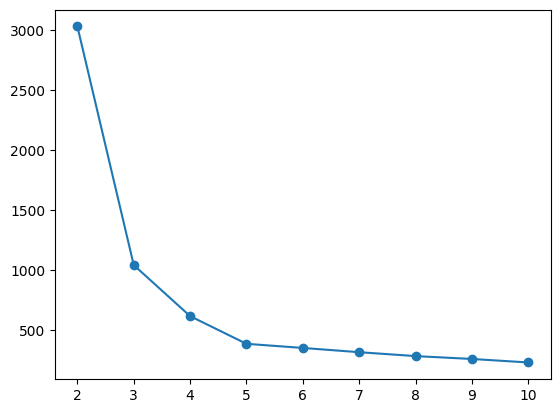

In [85]:
plt.plot(k_list,inertias,marker='o')
plt.show() # 많이떨어지는곳에서하는게좋음

In [86]:
model3 = KMeans(n_clusters=3)
model3.fit(x)
pred=model3.predict(x)
pred.shape

(200,)

In [87]:
cluster['cluster3']=pred

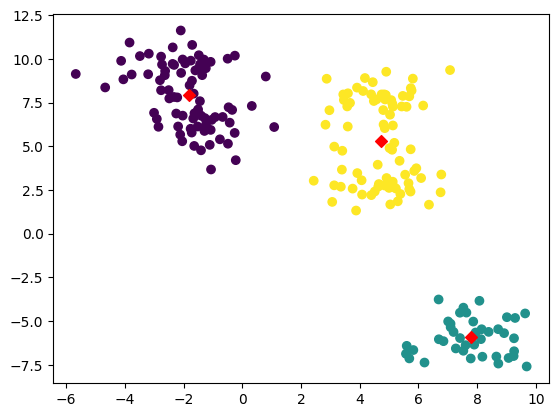

In [89]:
plt.scatter(cluster.iloc[:,0],cluster.iloc[:,1],c=cluster['cluster3'])
plt.scatter(model3.cluster_centers_[:,0],model3.cluster_centers_[:,1],c='r',marker='D')
plt.show()

# 군집 평가(Cluster Evaluation) :  다음 파일로 이동